In [1]:
# I load the needed libraries
library(dplyr)
library(scales)
library(GoFKernel)

library(mvtnorm)
library(gplots)

options(warn=-1)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: KernSmooth

KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess




# Preparation of the simulation

I load the functions from the class file:


In [2]:
source("../MCMC.R")

I define then the function that I want to use as output of the MCMCs:

In [3]:
# 5D distribution
gauss2_cauchy1_gauss2 = function (theta) {

    sigmas = c(2.5, 4.3, 0, 3.5, 5)
    centers = c(0.4, 9, 0, -4.7, 2.9)

    product = 1
    for (i in 1:2) {
        product = product * exp(-(theta[i] - centers[i])**2/sigmas[i]**2)
    }

    product = product * (dcauchy(theta[3], -10, 2) + 4*dcauchy(theta[3], 10, 4))

    for (i in 4:5) {
        product = product * exp(-(theta[i] - centers[i])**2/sigmas[i]**2)
    }

    return (product)

} 


chosen_function = gauss2_cauchy1_gauss2

Then I only have to determine the parameters for the initialization = the "hyperparameters" of the simulations

In [4]:
# The initial parameters are:
init = c(-4, -8, 12, 5, 3)
std = diag(1, 5)

N = as.integer(1e5)
burn_in = as.integer(1e4)

print_step = as.integer(1e3)
# print_init = as.integer(1e3)

N_tot = N + burn_in

# For Haario:
epsilon = 0.001


# Simulations

Acceptance rate =  69.41 %


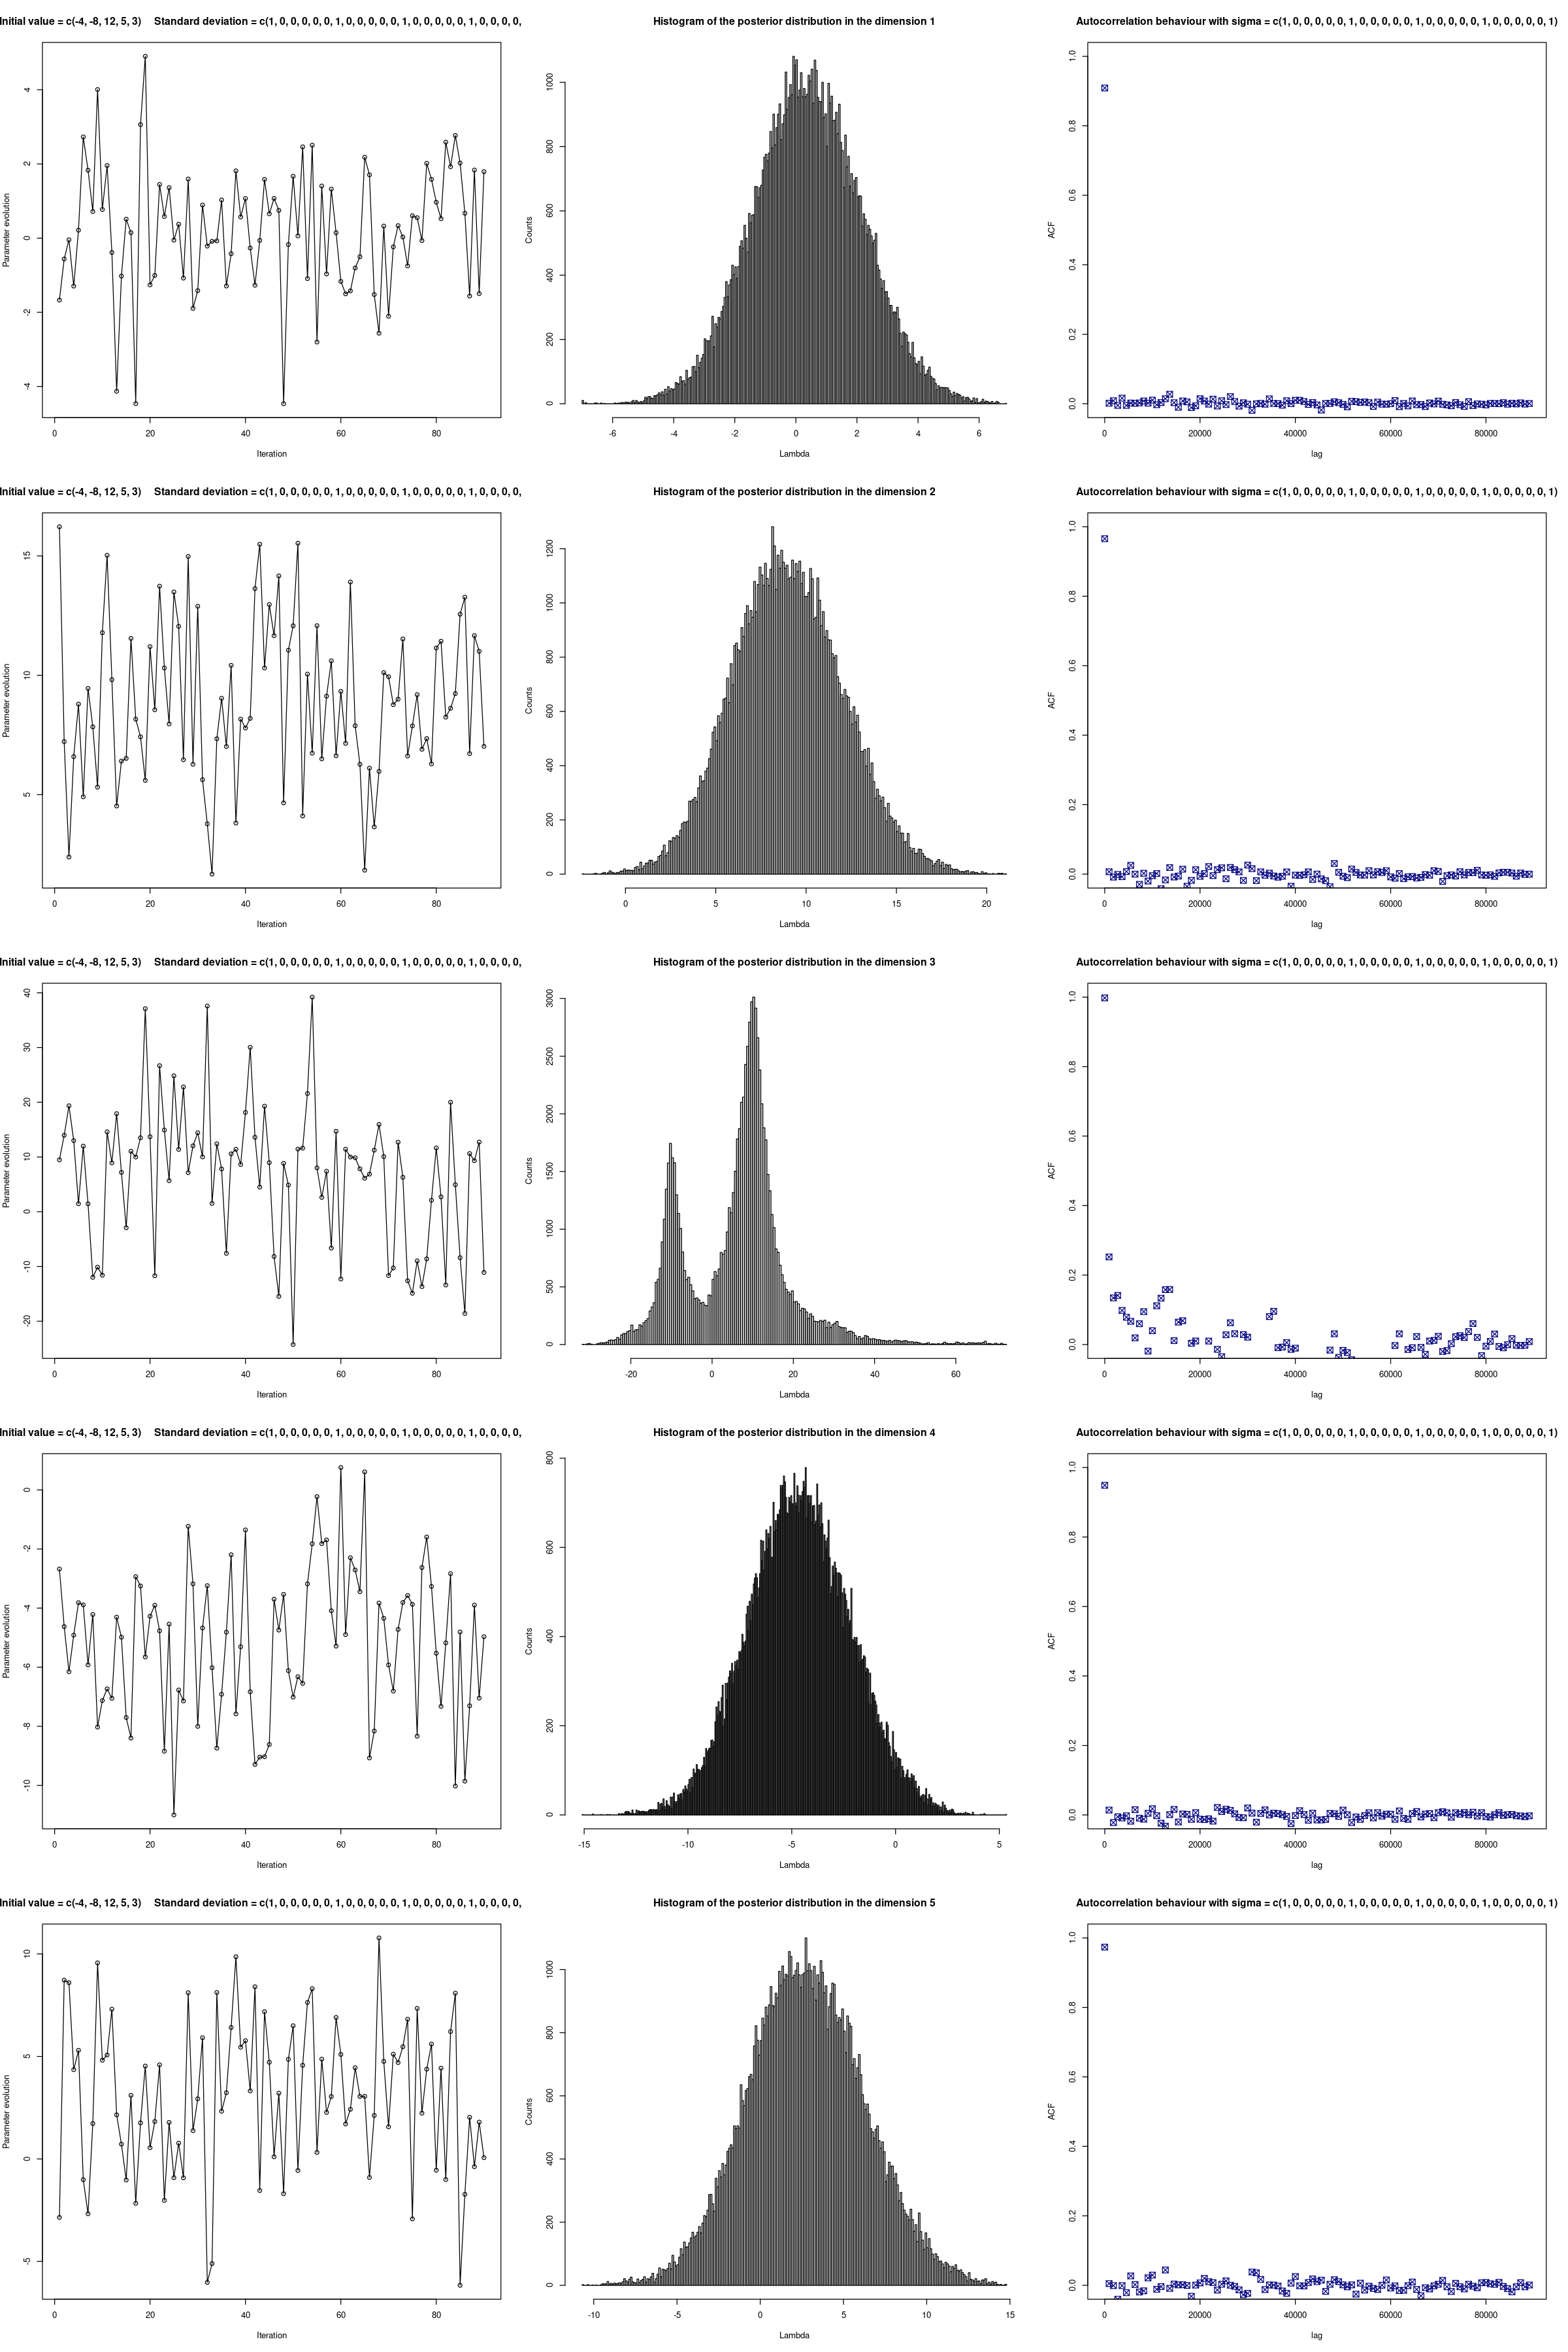

In [5]:
# MVTNORM 

# Evaluate then the MCMC
mcmc_g = random_steps_mvtnorm (func_wanted = chosen_function, theta_init = init, n_samples = N_tot, sigma = std, print_accept=TRUE)

# Selecting the sequence after the burn-in
mcmc_g = mcmc_g[burn_in:N, ]

# Plotting the results
show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

Acceptance rate =  83.37218 %


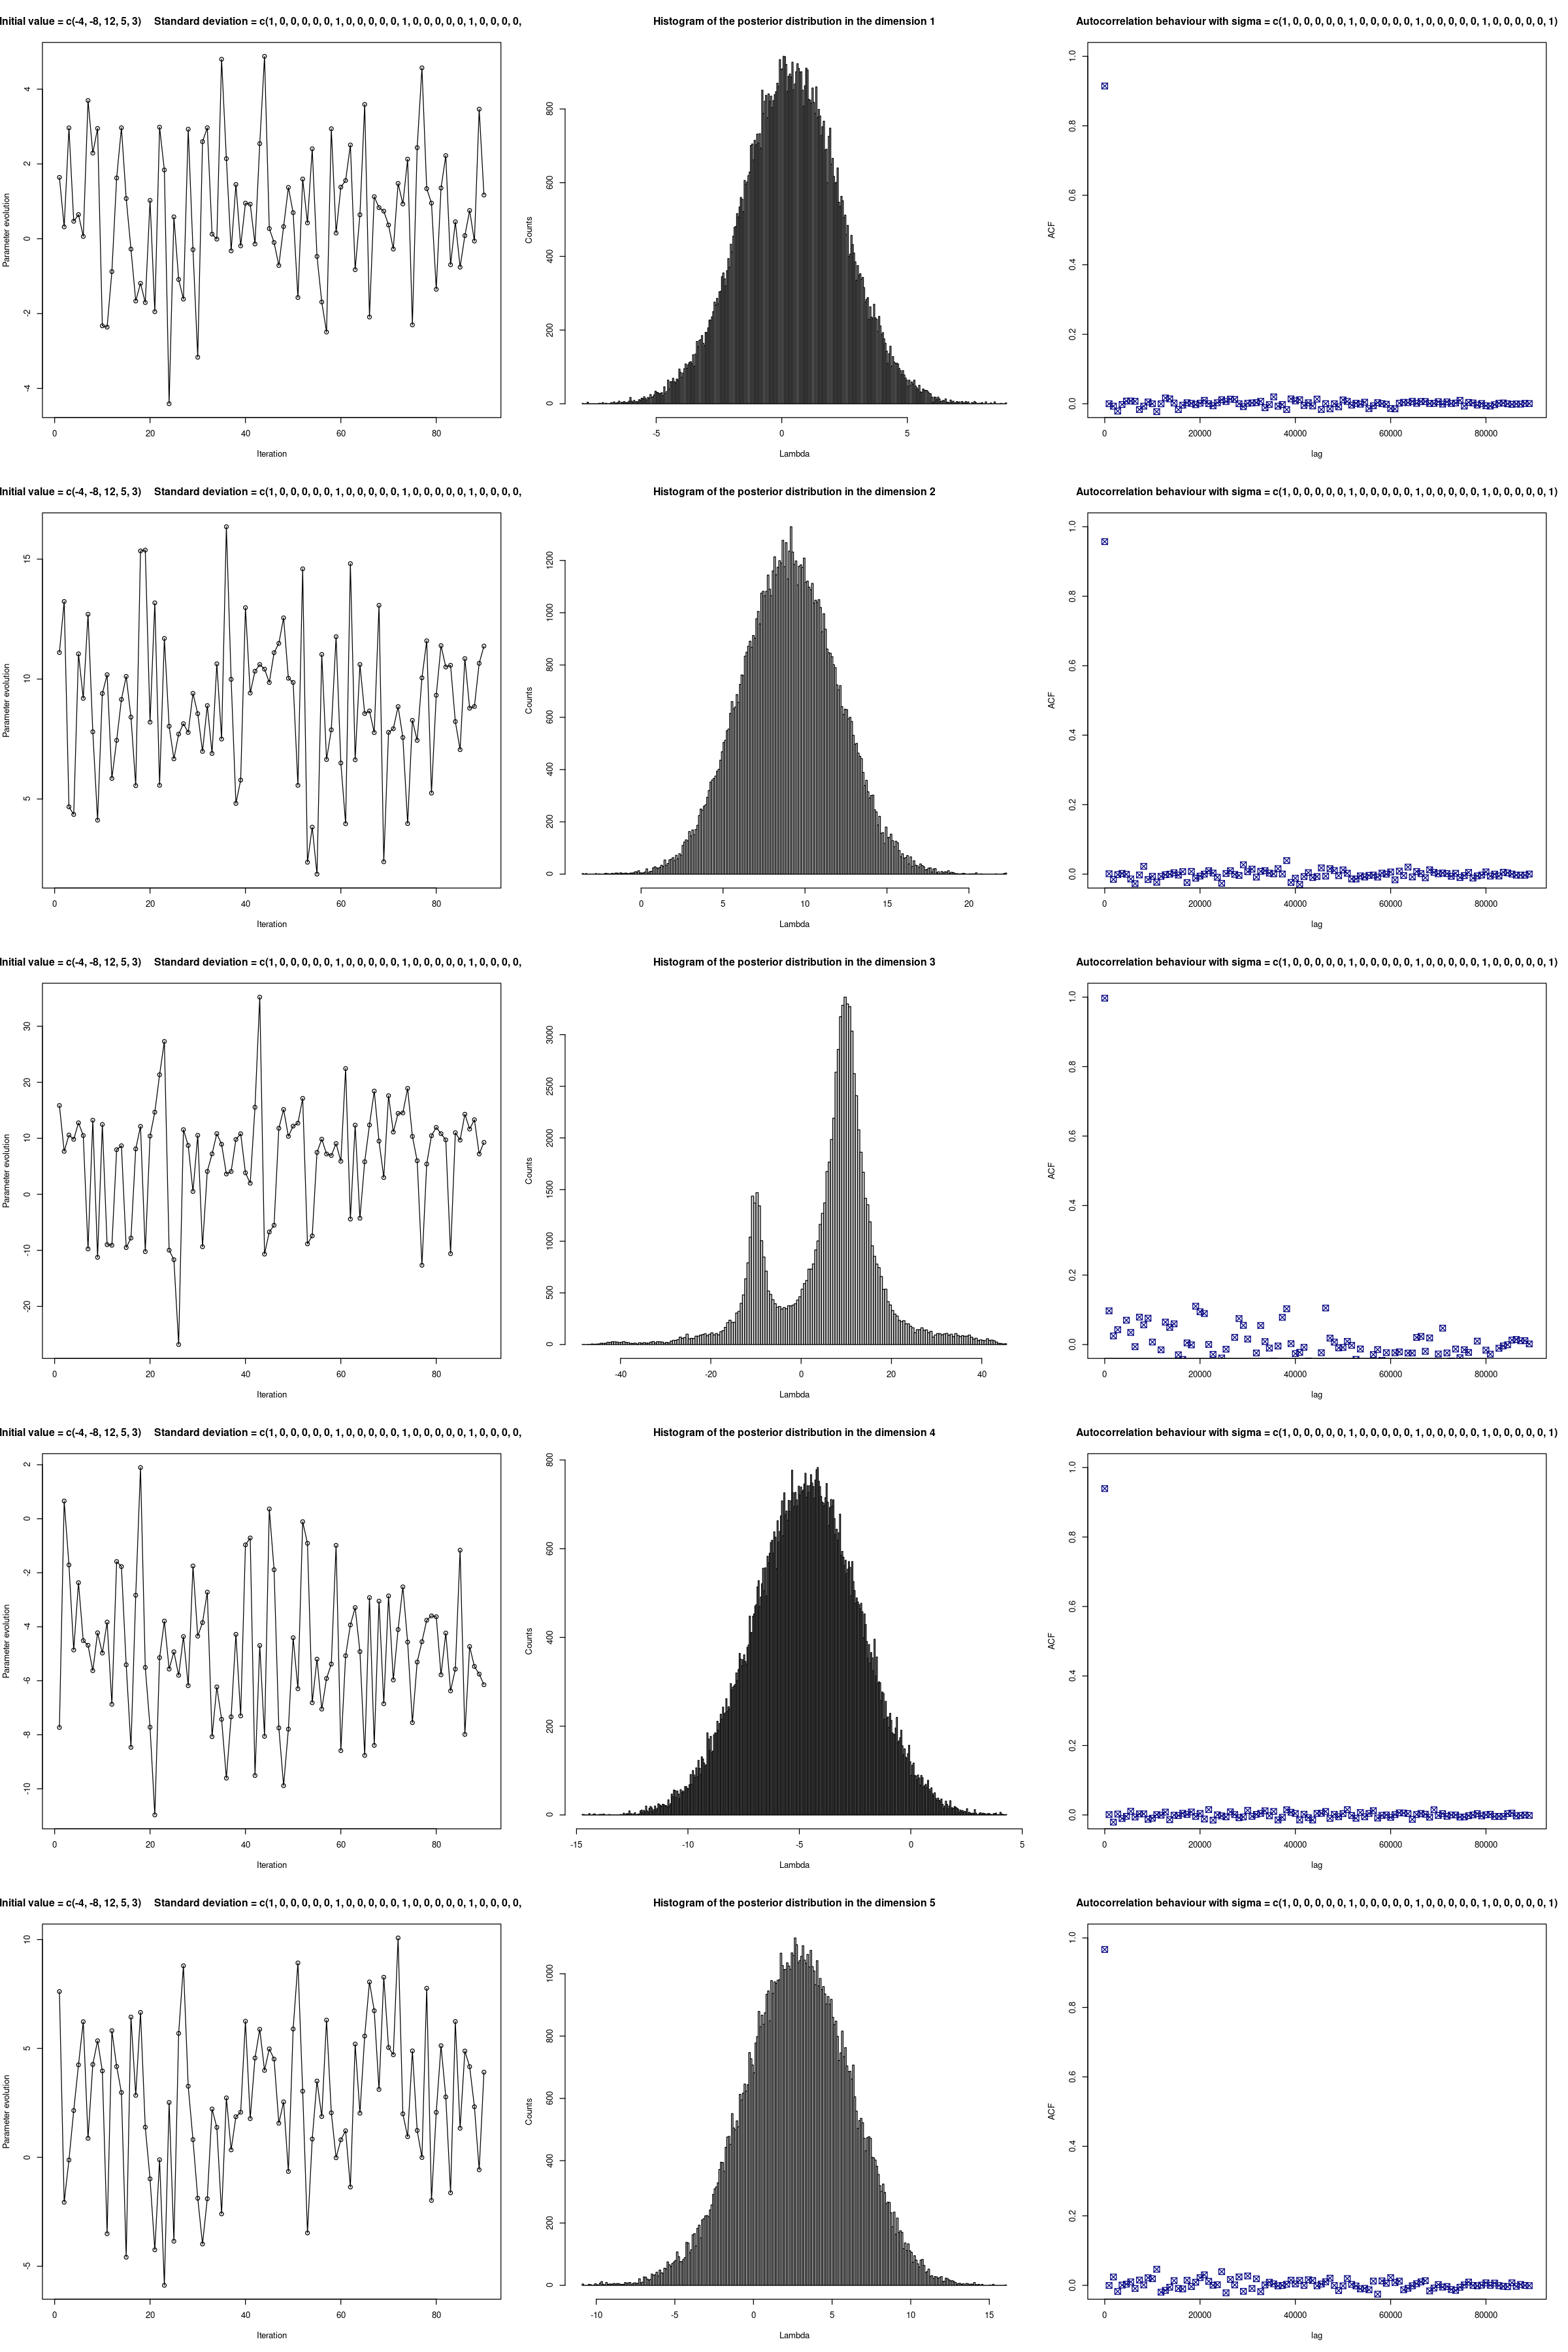

In [6]:
# MVTNORM GIBBS

mcmc_g = random_steps_mvtnorm_gibbs (func_wanted = chosen_function, theta_init = init, n_samples = N_tot, sigma = std, print_accept=TRUE)

mcmc_g = mcmc_g[burn_in:N, ]

show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

In [7]:
# # SIMPLE ADAPTIVE

# mcmc_g = random_steps_simple (func_wanted = chosen_function, theta_init = init, n_samples = N_tot, sigma = std, print_accept=TRUE, t_0 = burn_in,
#                                 gamma_function = gamma_series_exp, halved_step = burn_in)

# mcmc_g = mcmc_g[burn_in:N, ]

# show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

In [8]:
# # SIMPLE ADAPTIVE GIBBS

# mcmc_g = random_steps_simple_gibbs (func_wanted = chosen_function, theta_init = init, n_samples = N_tot, sigma = std, print_accept=TRUE, t_0 = burn_in,
#                                 gamma_function = gamma_series_exp, halved_step = burn_in)

# mcmc_g = mcmc_g[burn_in:N, ]

# show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

Acceptance rate =  13.56818 %
Final mean =  0.4173357 9.032144 6.578067 -4.72742 2.926956 
Final covariance matrix = 
          [,1]       [,2]        [,3]       [,4]       [,5]
[1,]  3.914981   7.081224    2.554218  -3.690795   2.254914
[2,]  7.081224 179.412410  116.116555 -87.913978  51.627043
[3,]  2.554218 116.116555 1199.195724 -60.511914  34.403776
[4,] -3.690795 -87.913978  -60.511914  52.684231 -26.628031
[5,]  2.254914  51.627043   34.403776 -26.628031  30.243933


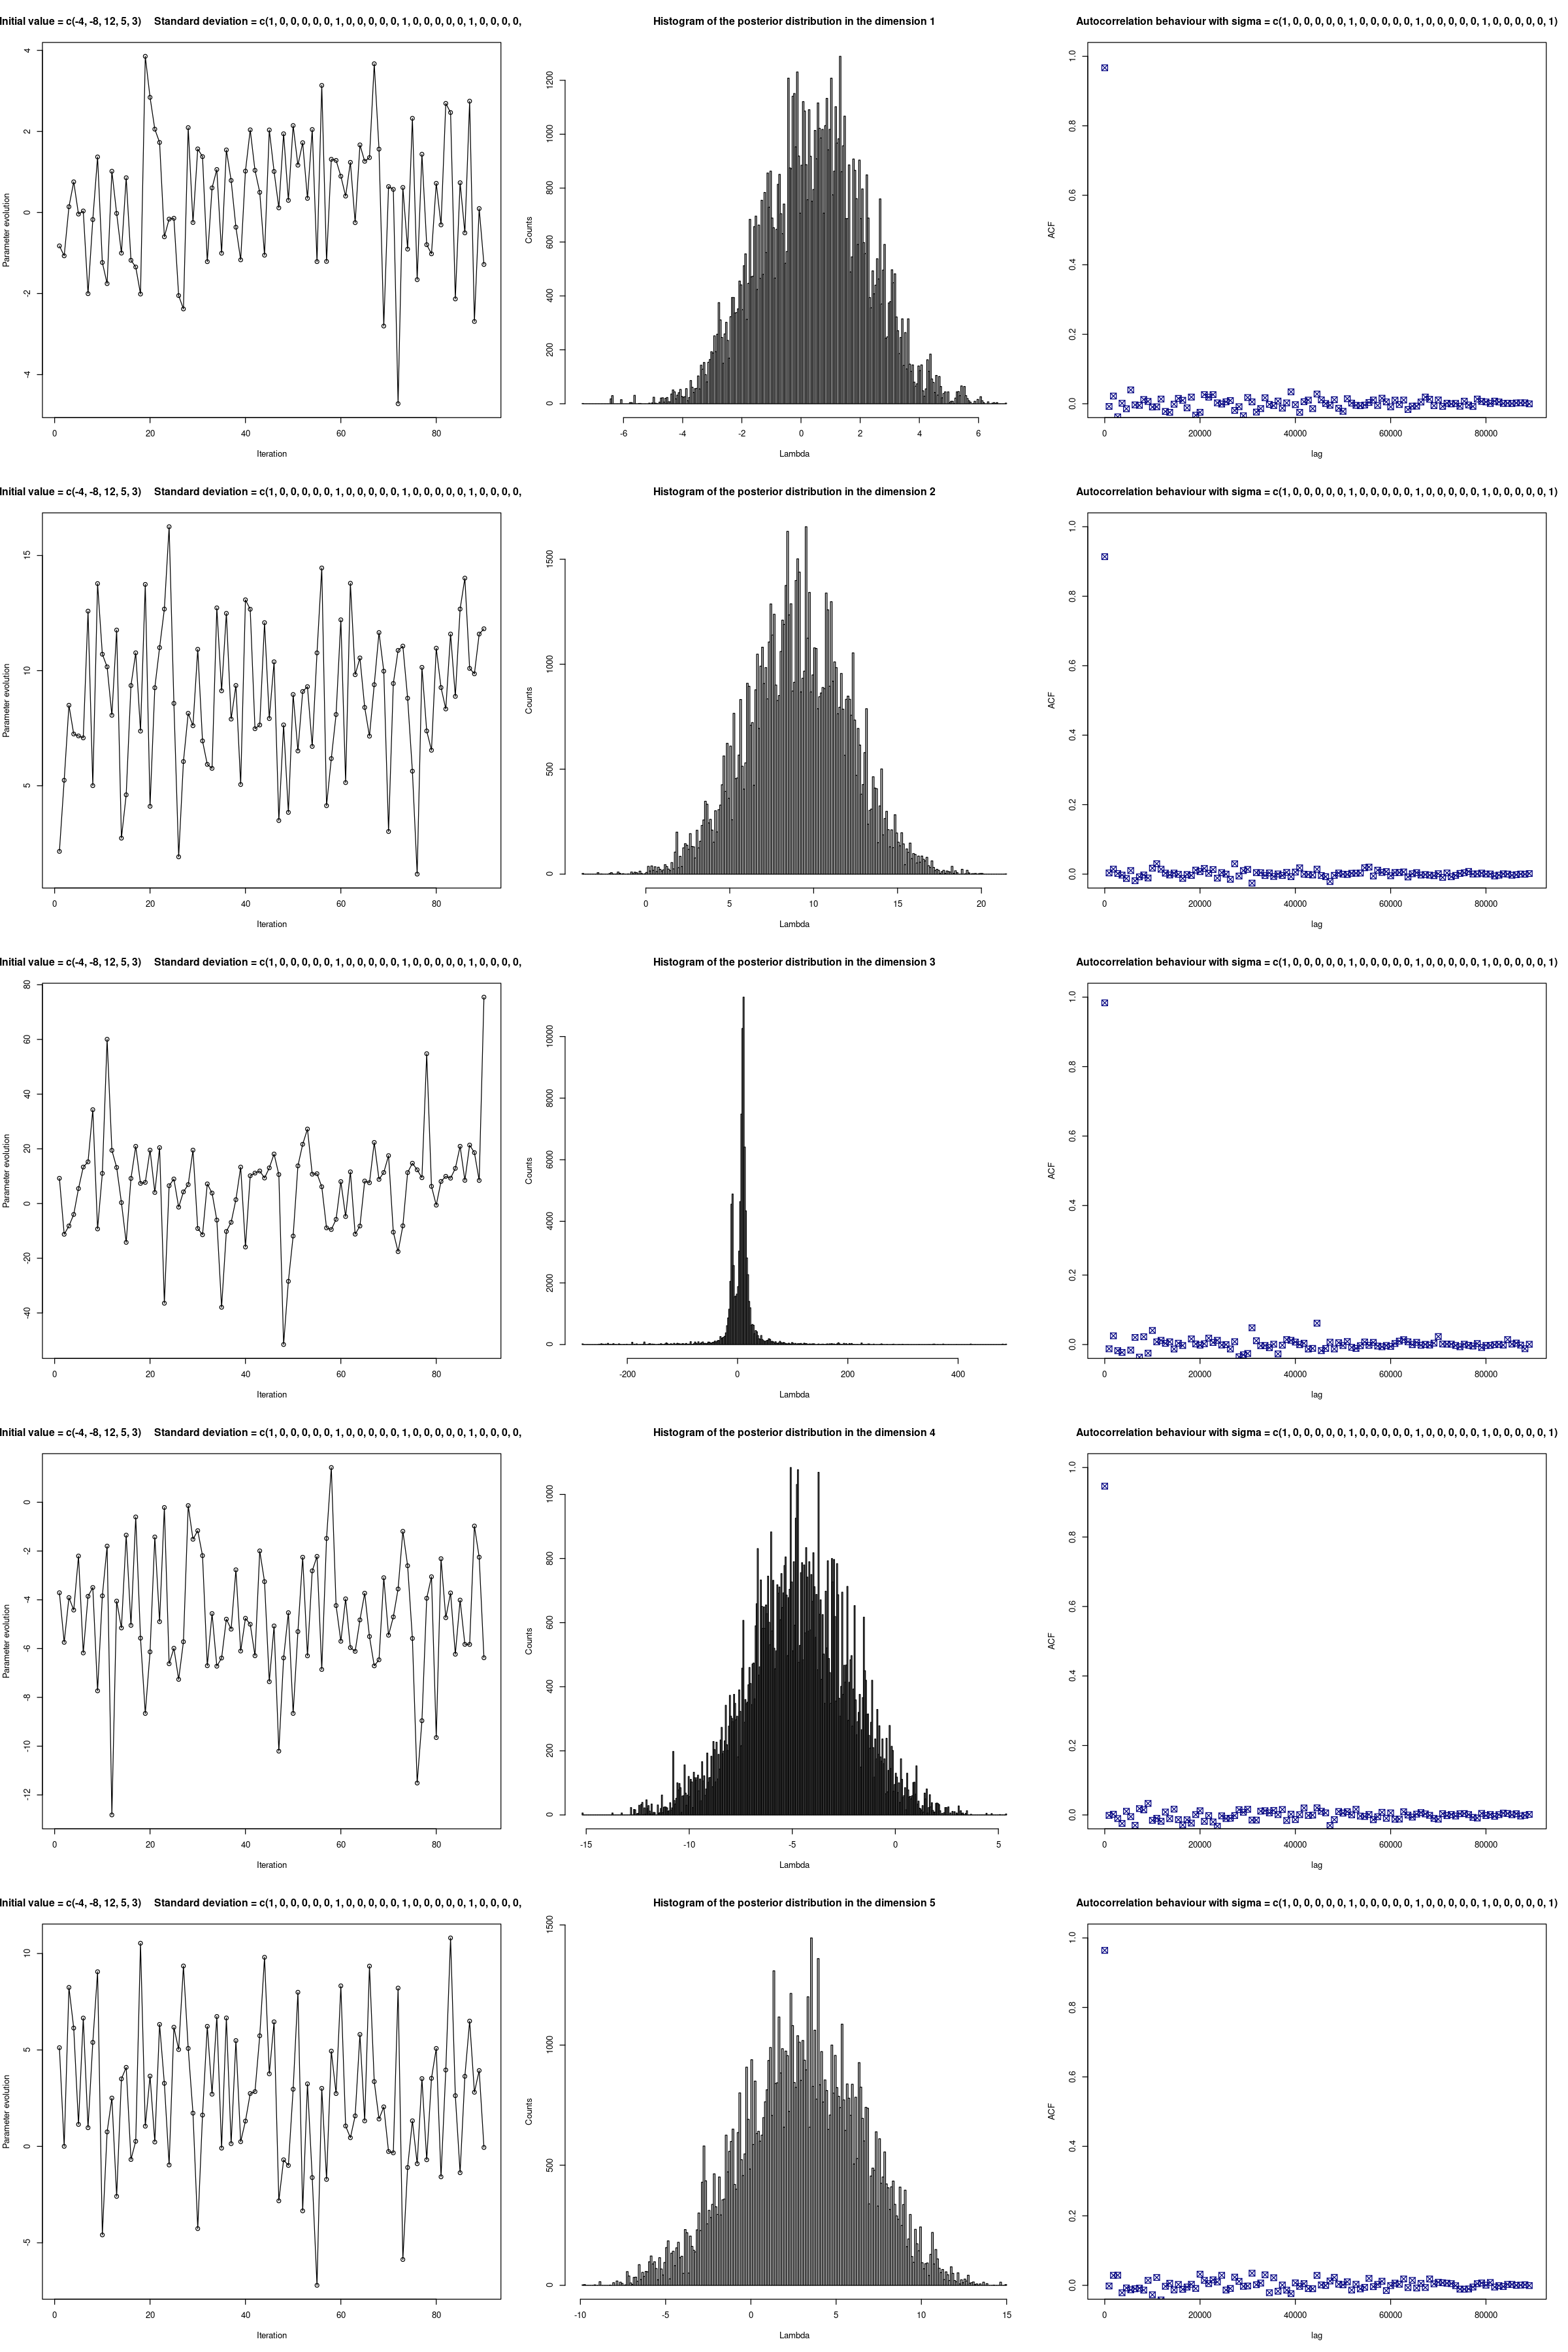

In [9]:
# HAARIO

mcmc_g = random_steps_haario (func_wanted = chosen_function, theta_init = init, n_samples = N_tot,
                                sigma = std, print_accept=TRUE, t_0 = burn_in, eps = epsilon)

mcmc_g = mcmc_g[burn_in:N, ]

show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

Acceptance rate =  29.37145 %
Final mean =  0.4114063 9.015594 5.265951 -4.70261 2.890626 
Final covariance matrix = 
          [,1]       [,2]       [,3]       [,4]       [,5]
[1,]  4.414695   7.664471   3.895315  -3.980304   2.425278
[2,]  7.664471 178.227179  92.807699 -87.516189  53.632401
[3,]  3.895315  92.807699 448.069067 -47.654876  29.787966
[4,] -3.980304 -87.516189 -47.654876  50.796443 -27.803152
[5,]  2.425278  53.632401  29.787966 -27.803152  28.153793


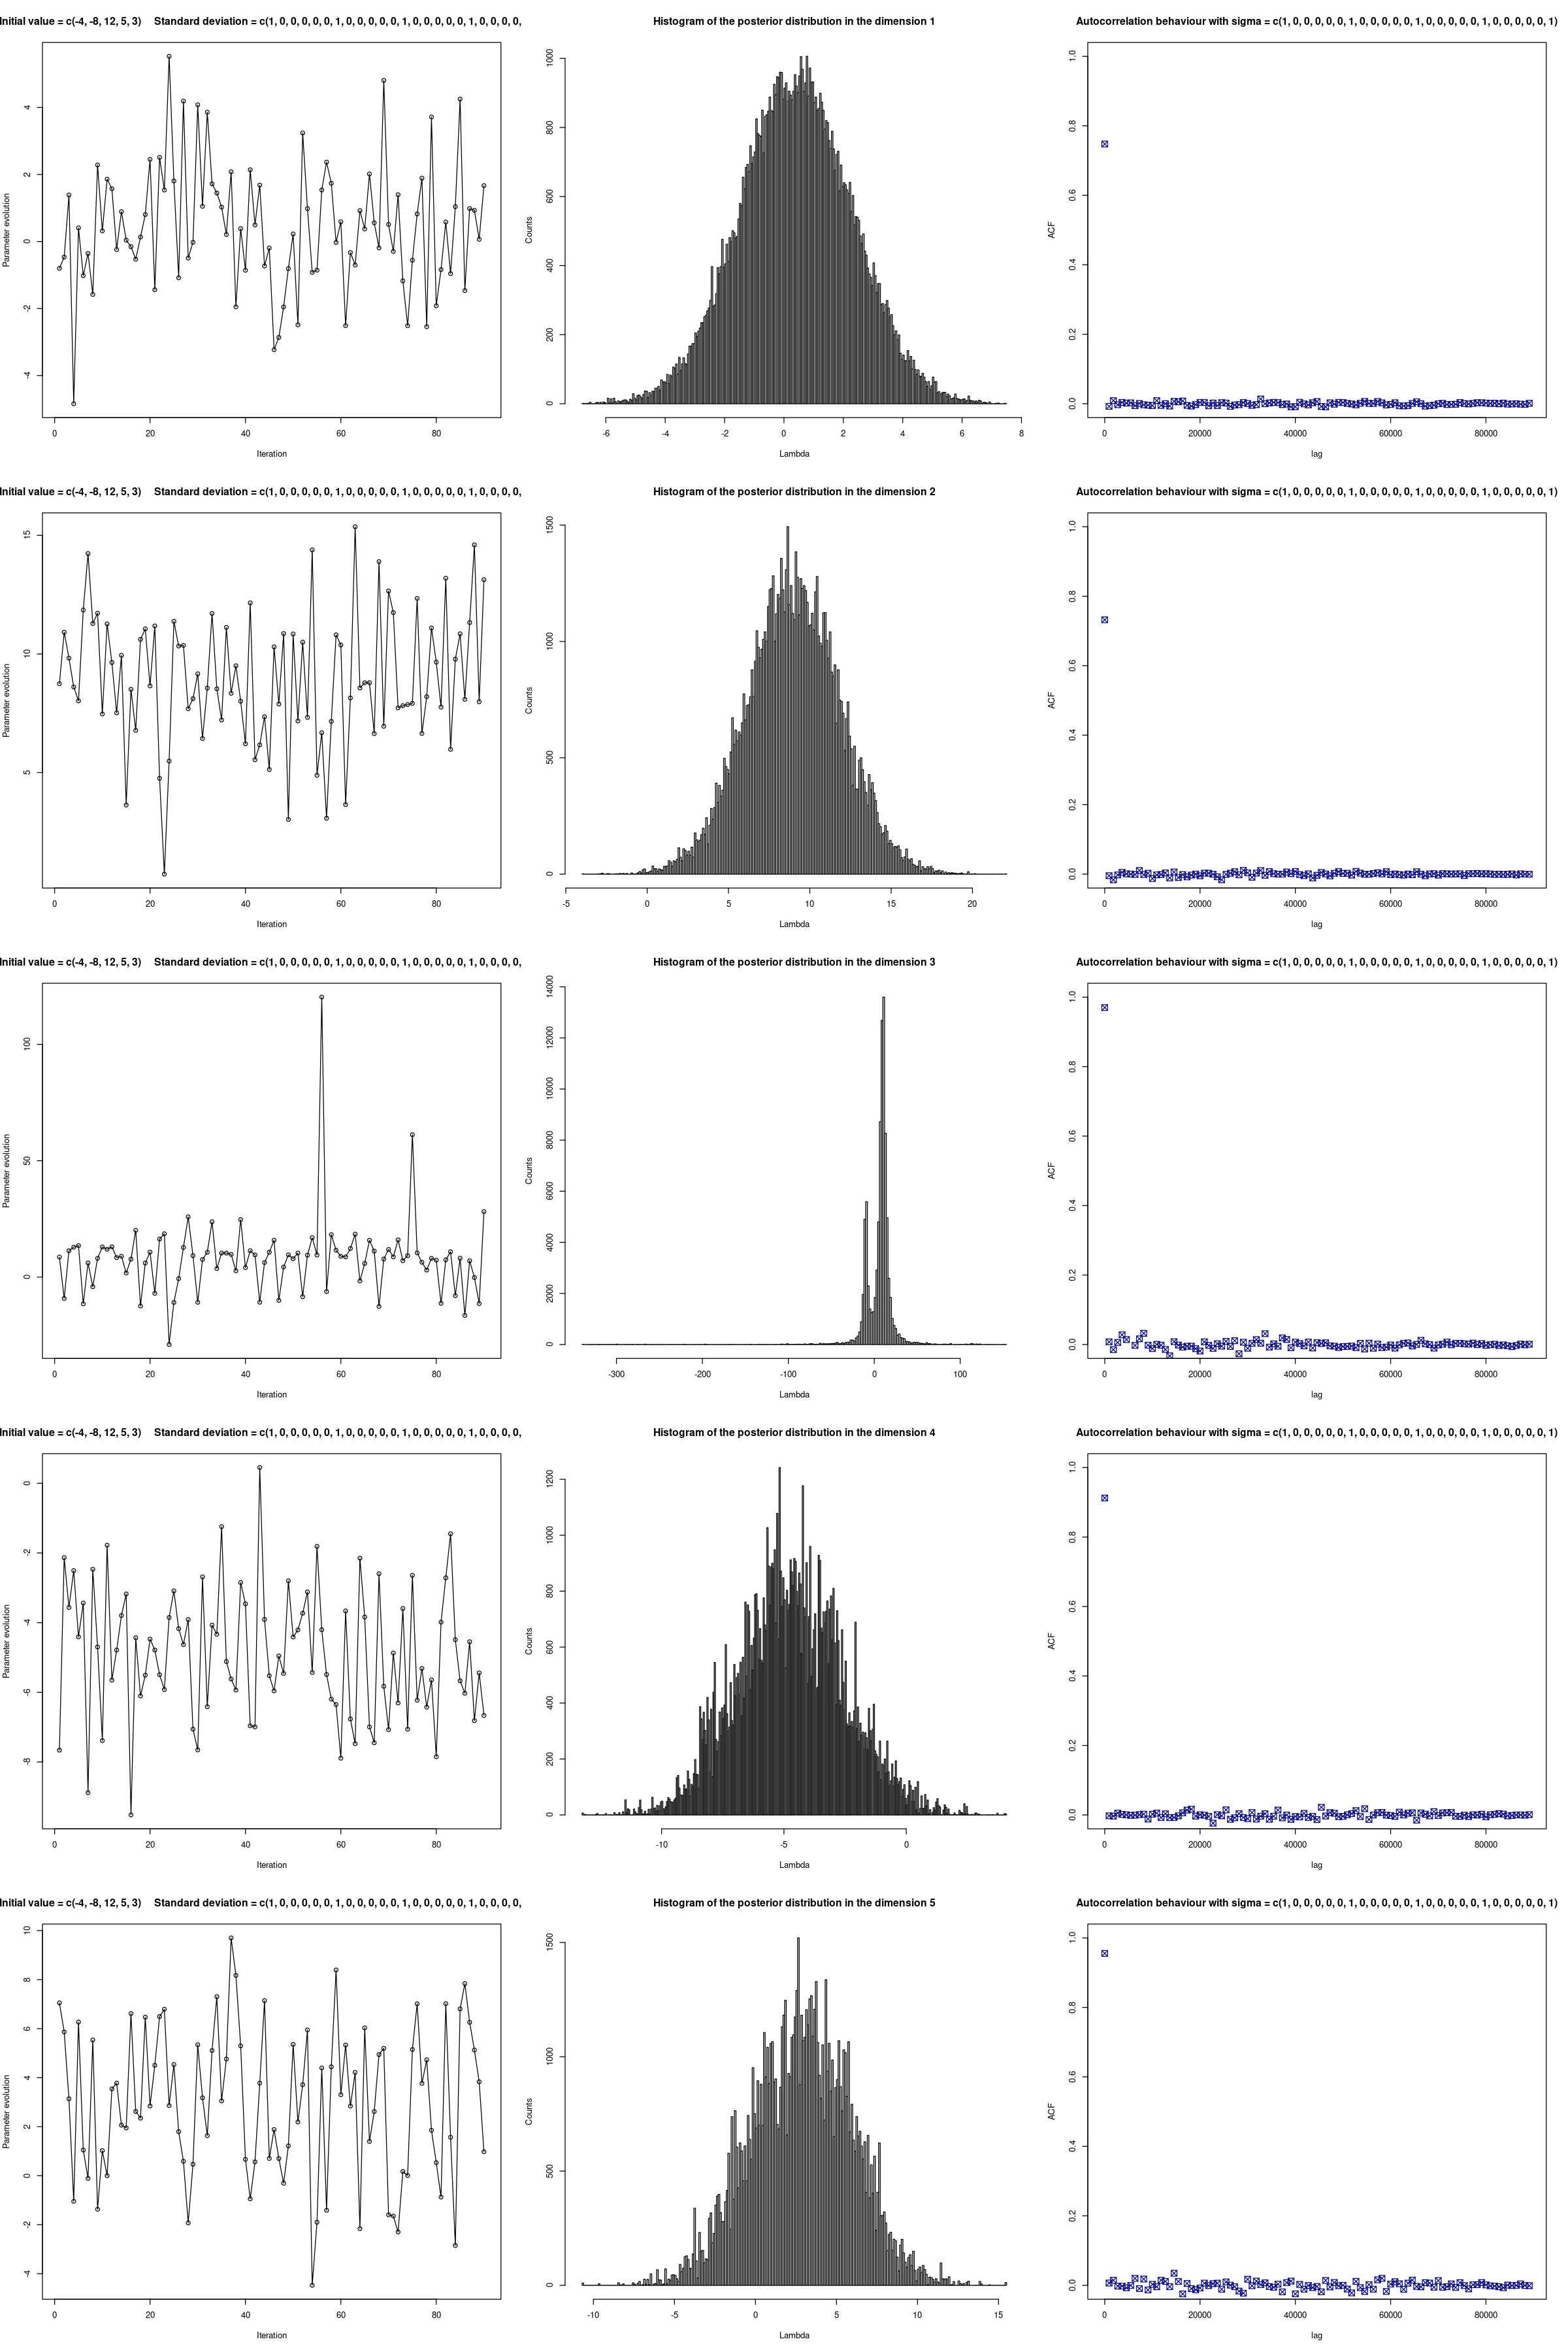

In [10]:
# HAARIO GIBBS

mcmc_g = random_steps_haario_gibbs (func_wanted = chosen_function, theta_init = init, n_samples = N_tot,
                                    sigma = std, print_accept=TRUE, t_0 = burn_in, eps = epsilon)

mcmc_g = mcmc_g[burn_in:N, ]

show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

Acceptance rate =  36.88909 %
Final mean =  0.3917229 8.968722 7.366672 -4.763669 2.831317 
Final covariance matrix = 
              [,1]          [,2]        [,3]        [,4]       [,5]
[1,]  3.0088398258  0.0002888846   0.1323956  0.09912867 -0.1038629
[2,]  0.0002888846  8.7136018731   0.1597129 -0.10647327  0.2459785
[3,]  0.1323955555  0.1597129264 472.9188504 -1.31778213  1.2790372
[4,]  0.0991286658 -0.1064732698  -1.3177821  5.85850967 -0.2897623
[5,] -0.1038628930  0.2459785400   1.2790372 -0.28976233 12.4707301


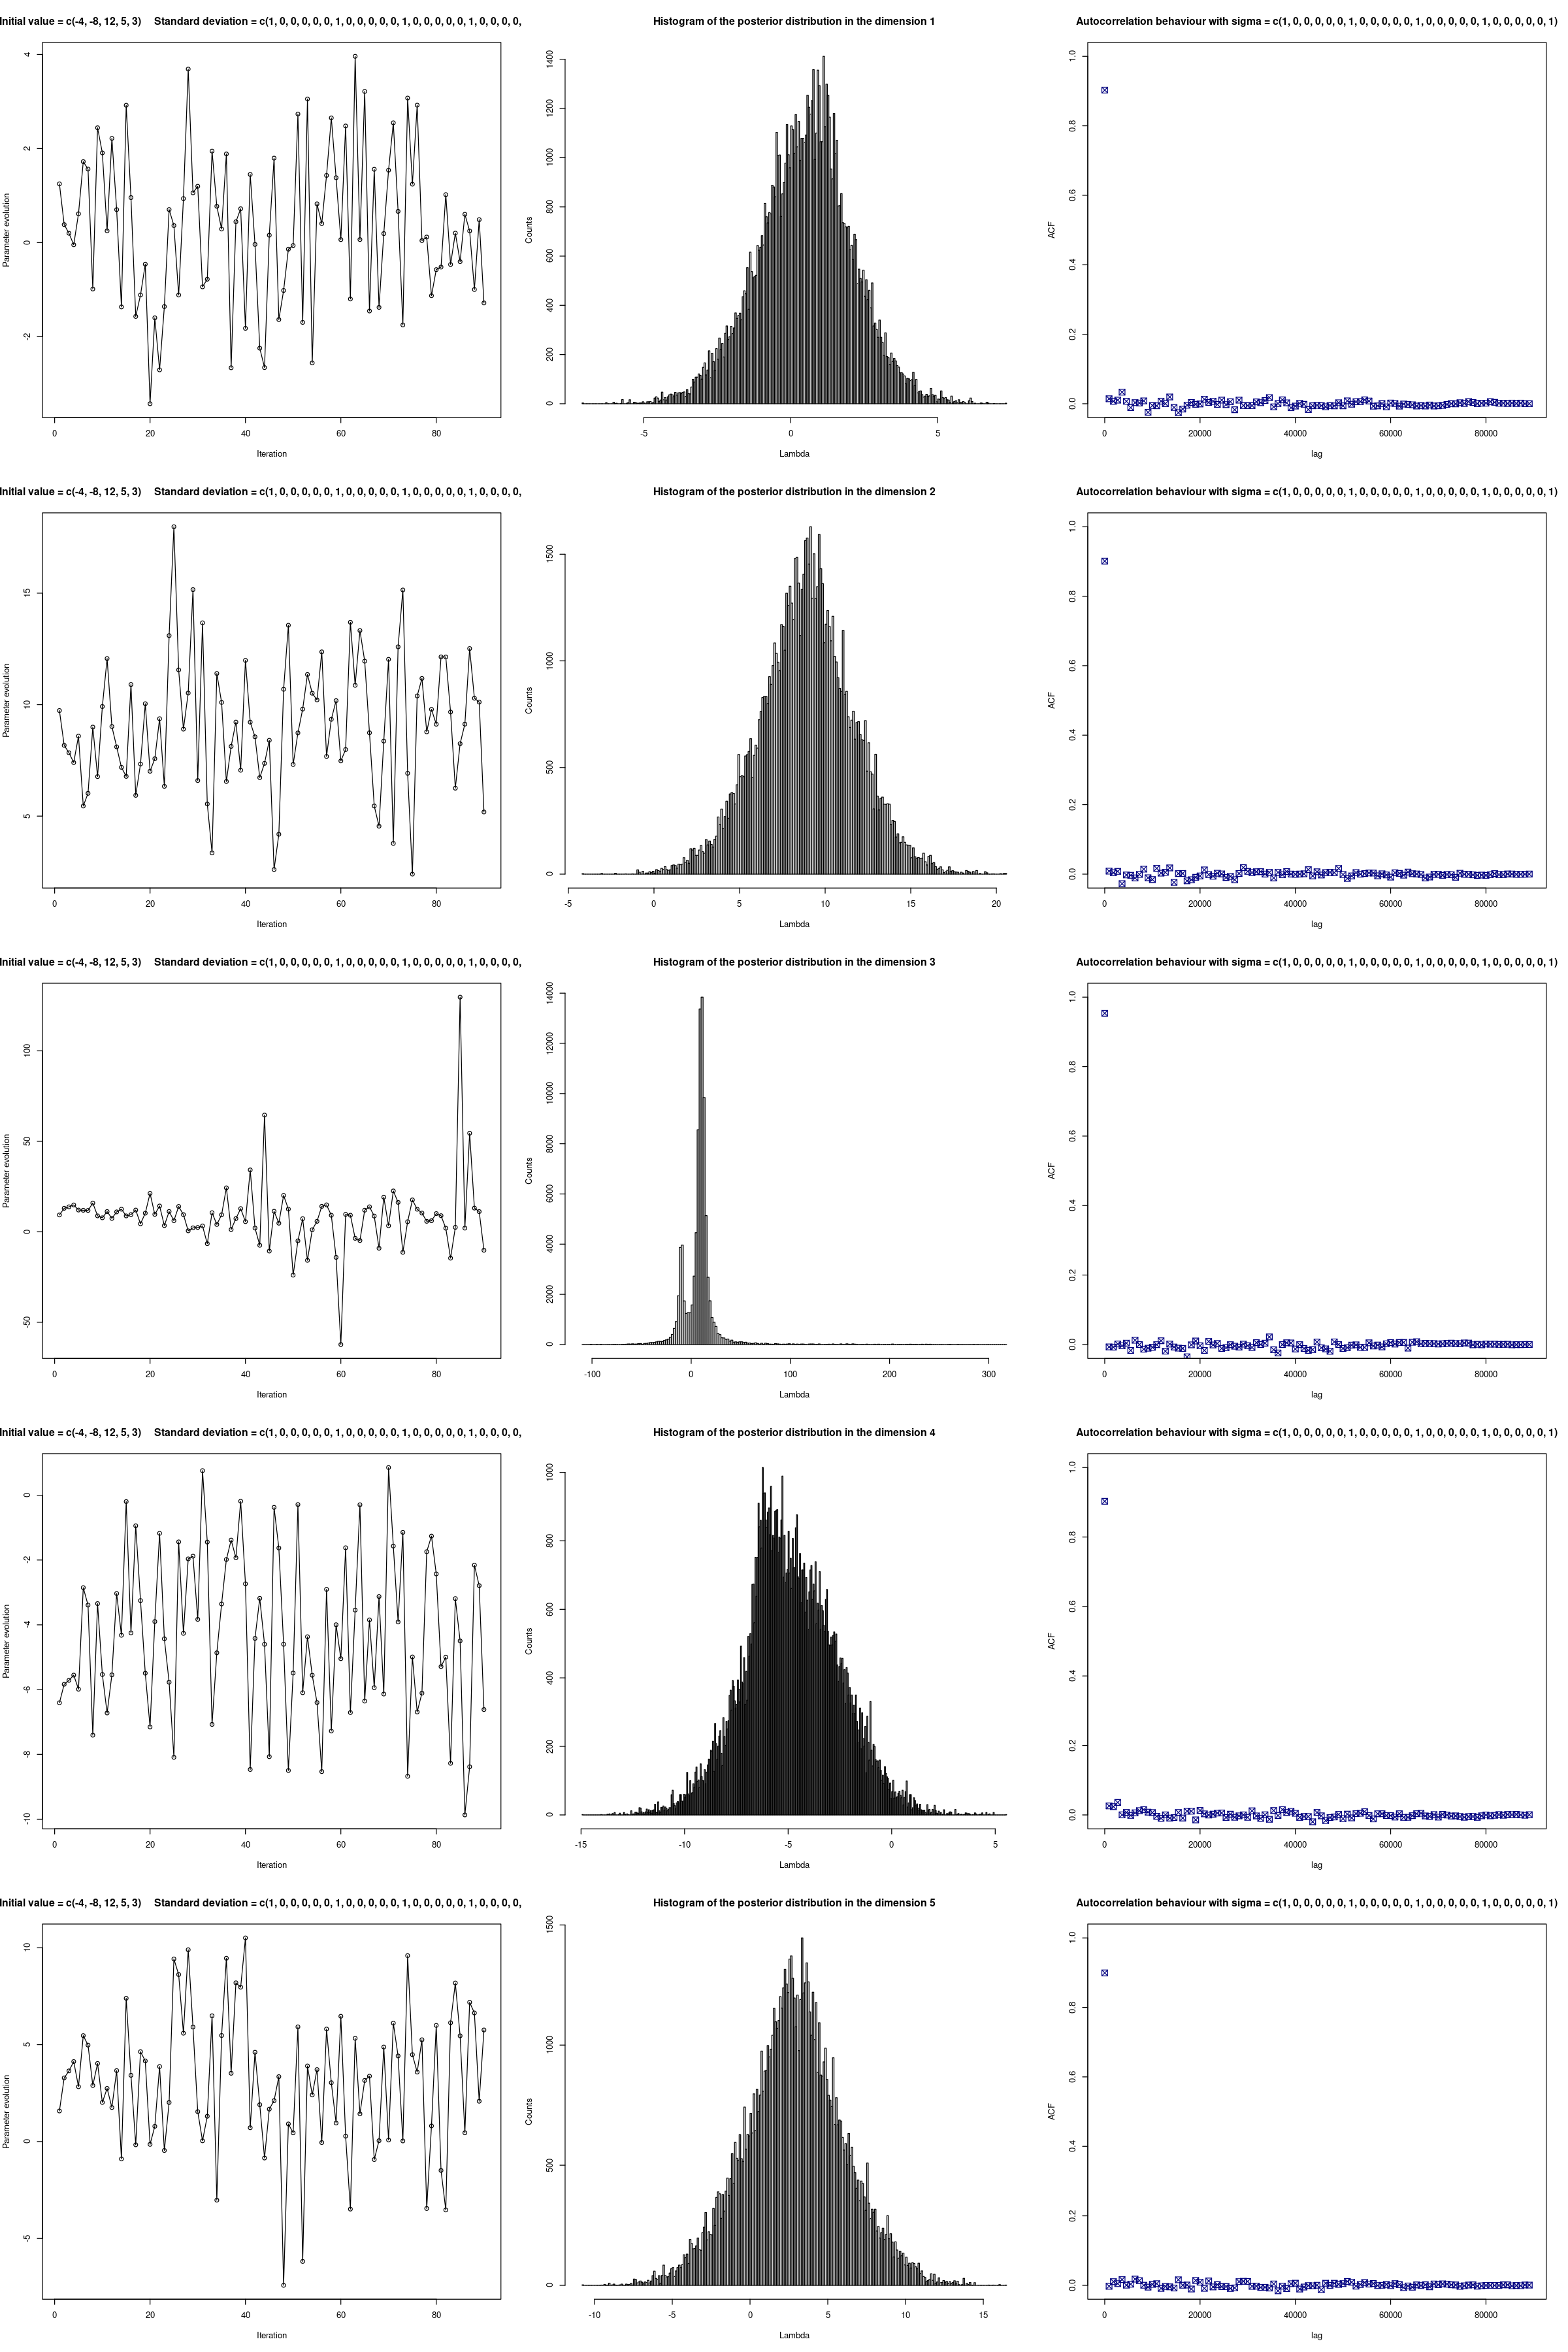

In [11]:
# RAO

mcmc_g = random_steps_AM_rao (func_wanted = chosen_function, theta_init = init, n_samples = N_tot, sigma = std, print_accept=TRUE, t_0 = burn_in,
                                gamma_function = gamma_series_exp, halved_step = burn_in/2)

mcmc_g = mcmc_g[burn_in:N, ]

show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

Acceptance rate =  51.39073 %
Final mean =  0.3741143 9.006435 5.43853 -4.642516 2.965173 
Final covariance matrix = 
            [,1]       [,2]        [,3]       [,4]        [,5]
[1,]  4.11894917  0.1256405  -1.3172494 -0.1479096  0.07896271
[2,]  0.12564047  8.2299207   0.7395609 -0.1760347 -0.29689386
[3,] -1.31724937  0.7395609 474.4885539 -0.4377462  0.52505146
[4,] -0.14790959 -0.1760347  -0.4377462  4.8284430  0.24227255
[5,]  0.07896271 -0.2968939   0.5250515  0.2422726 10.29984925


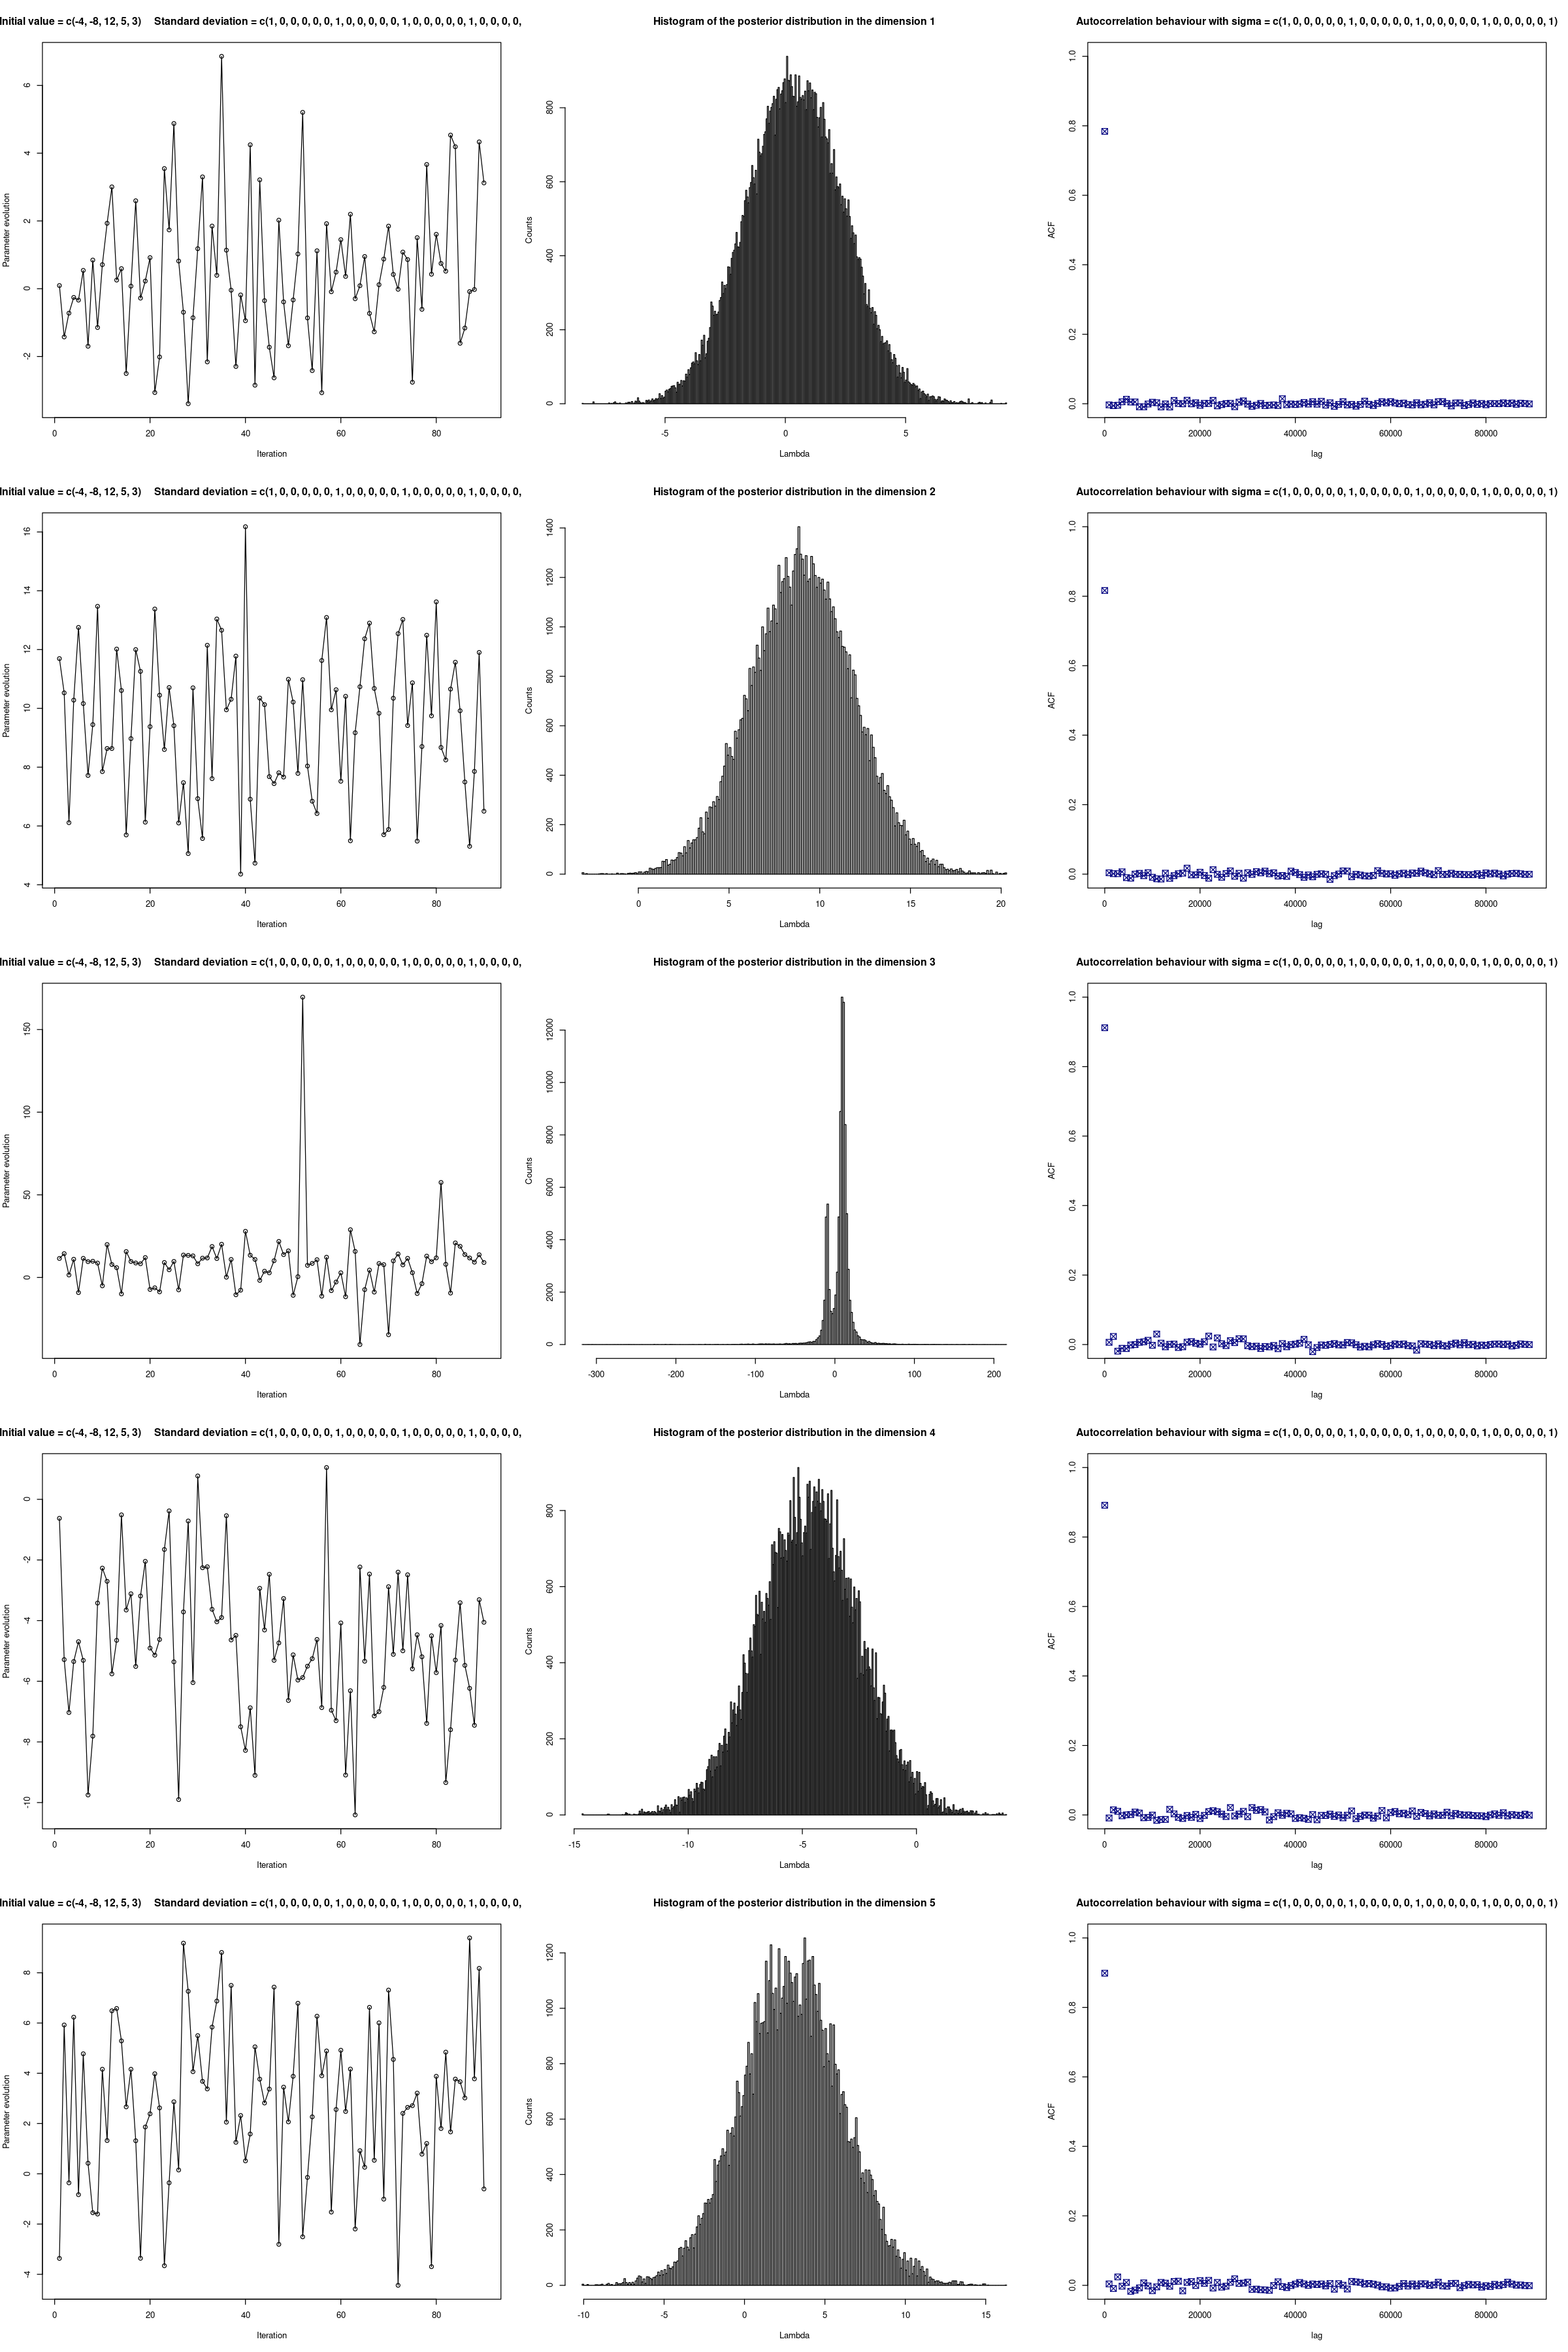

In [12]:
# RAO GIBBS

mcmc_g = random_steps_AM_rao_gibbs (func_wanted = chosen_function, theta_init = init, n_samples = N_tot, sigma = std, print_accept=TRUE, t_0 = burn_in,
                                gamma_function = gamma_series_exp, halved_step = burn_in/2)

mcmc_g = mcmc_g[burn_in:N, ]

show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

Acceptance rate =  55.77818 %
Final mean =  0.4813278 9.369746 5.938894 -4.953079 3.073692 
Final lambda =  -0.7861974 
Final covariance matrix = 
            [,1]          [,2]        [,3]        [,4]          [,5]
[1,]  3.08203930  1.390832e-01  -0.6849712 -0.01537526  7.019644e-01
[2,]  0.13908322  8.082688e+00   1.4351828 -0.37744897  2.639595e-05
[3,] -0.68497115  1.435183e+00 180.1990594 -4.75232439  1.864552e+00
[4,] -0.01537526 -3.774490e-01  -4.7523244  5.46237152 -4.764558e-02
[5,]  0.70196443  2.639595e-05   1.8645517 -0.04764558  1.135100e+01


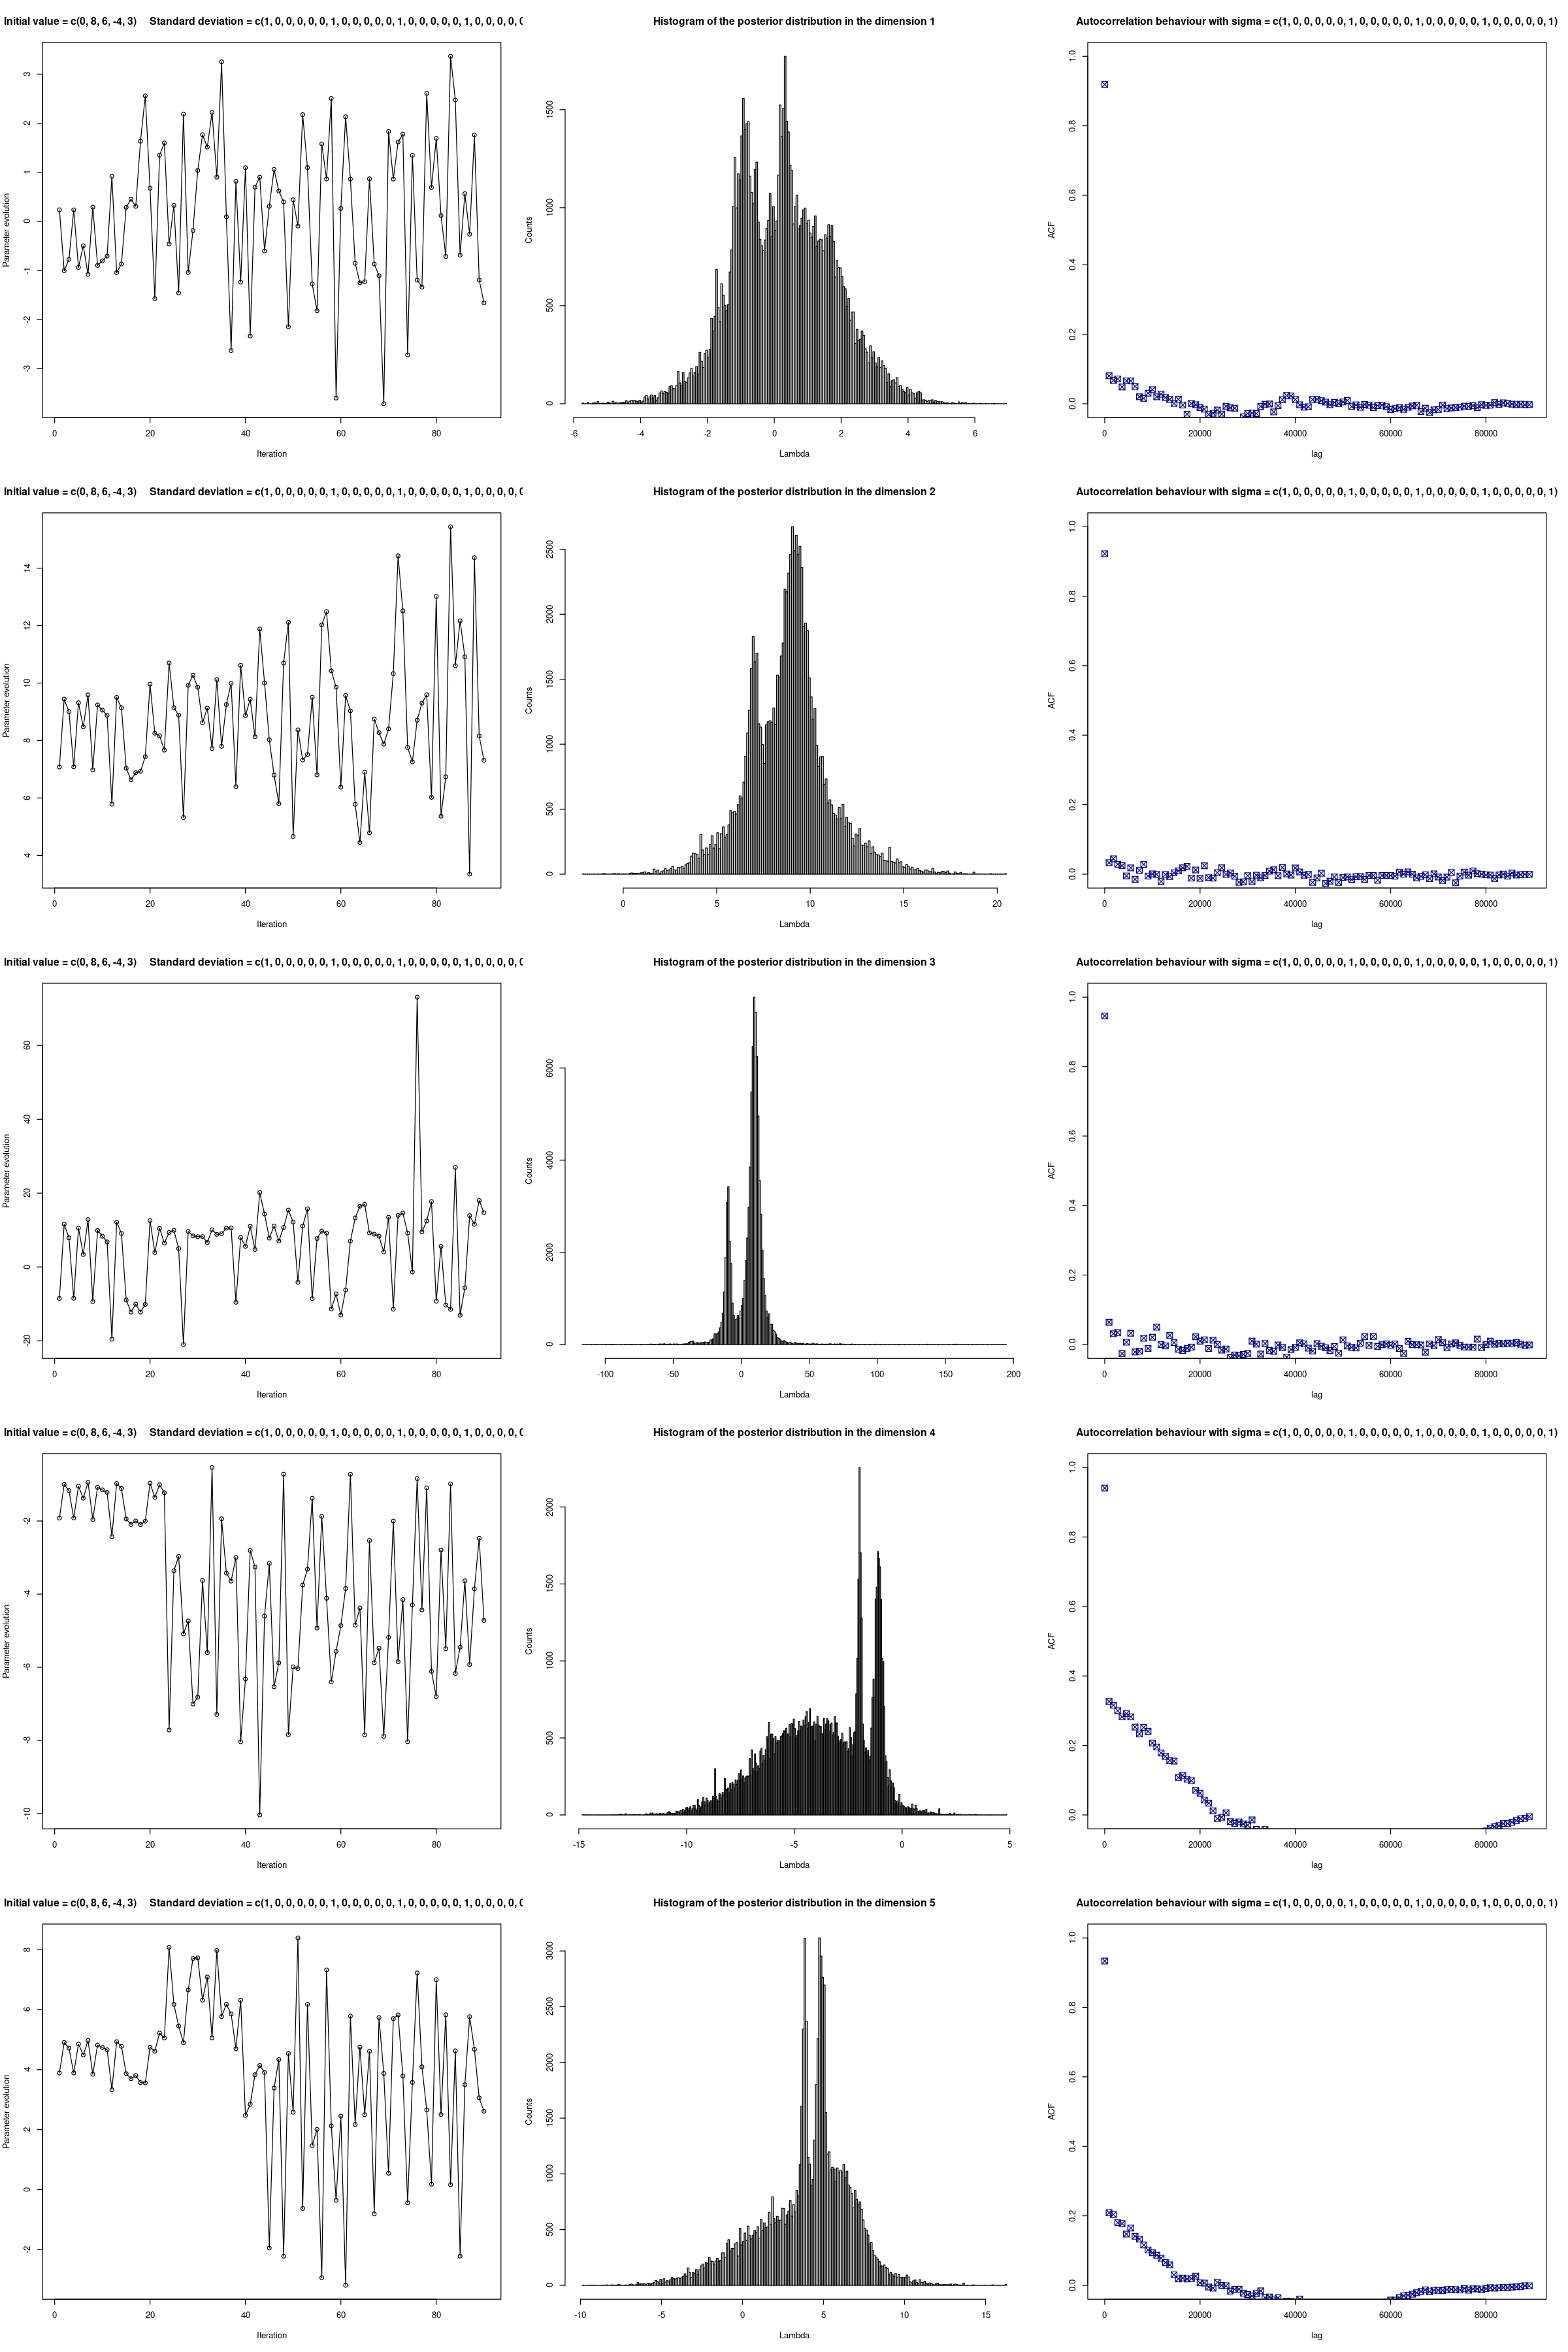

In [13]:
# GLOBAL

init = c(0, 8, 6, -4, 3)

mcmc_g = random_steps_global (func_wanted = chosen_function, theta_init = init, n_samples = N_tot, sigma = std, print_accept=TRUE, t_0 = burn_in,
                                gamma_function = gamma_series_exp, halved_step = burn_in)

mcmc_g = mcmc_g[burn_in:N, ]

show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

Acceptance rate =  70.88873 %
Final mean =  -0.02684684 9.14537 6.098406 -4.599139 2.773816 
Final lambda =  -1.581872 
Final covariance matrix = 
           [,1]       [,2]        [,3]       [,4]       [,5]
[1,]  4.1862736  0.4642784   0.4026021  0.4094794 -0.1199650
[2,]  0.4642784  8.5830523  -6.3348836  0.1408398 -1.3449306
[3,]  0.4026021 -6.3348836 213.5341447 -2.9299913  3.9804706
[4,]  0.4094794  0.1408398  -2.9299913  4.3208740 -0.2290501
[5,] -0.1199650 -1.3449306   3.9804706 -0.2290501 10.4781916


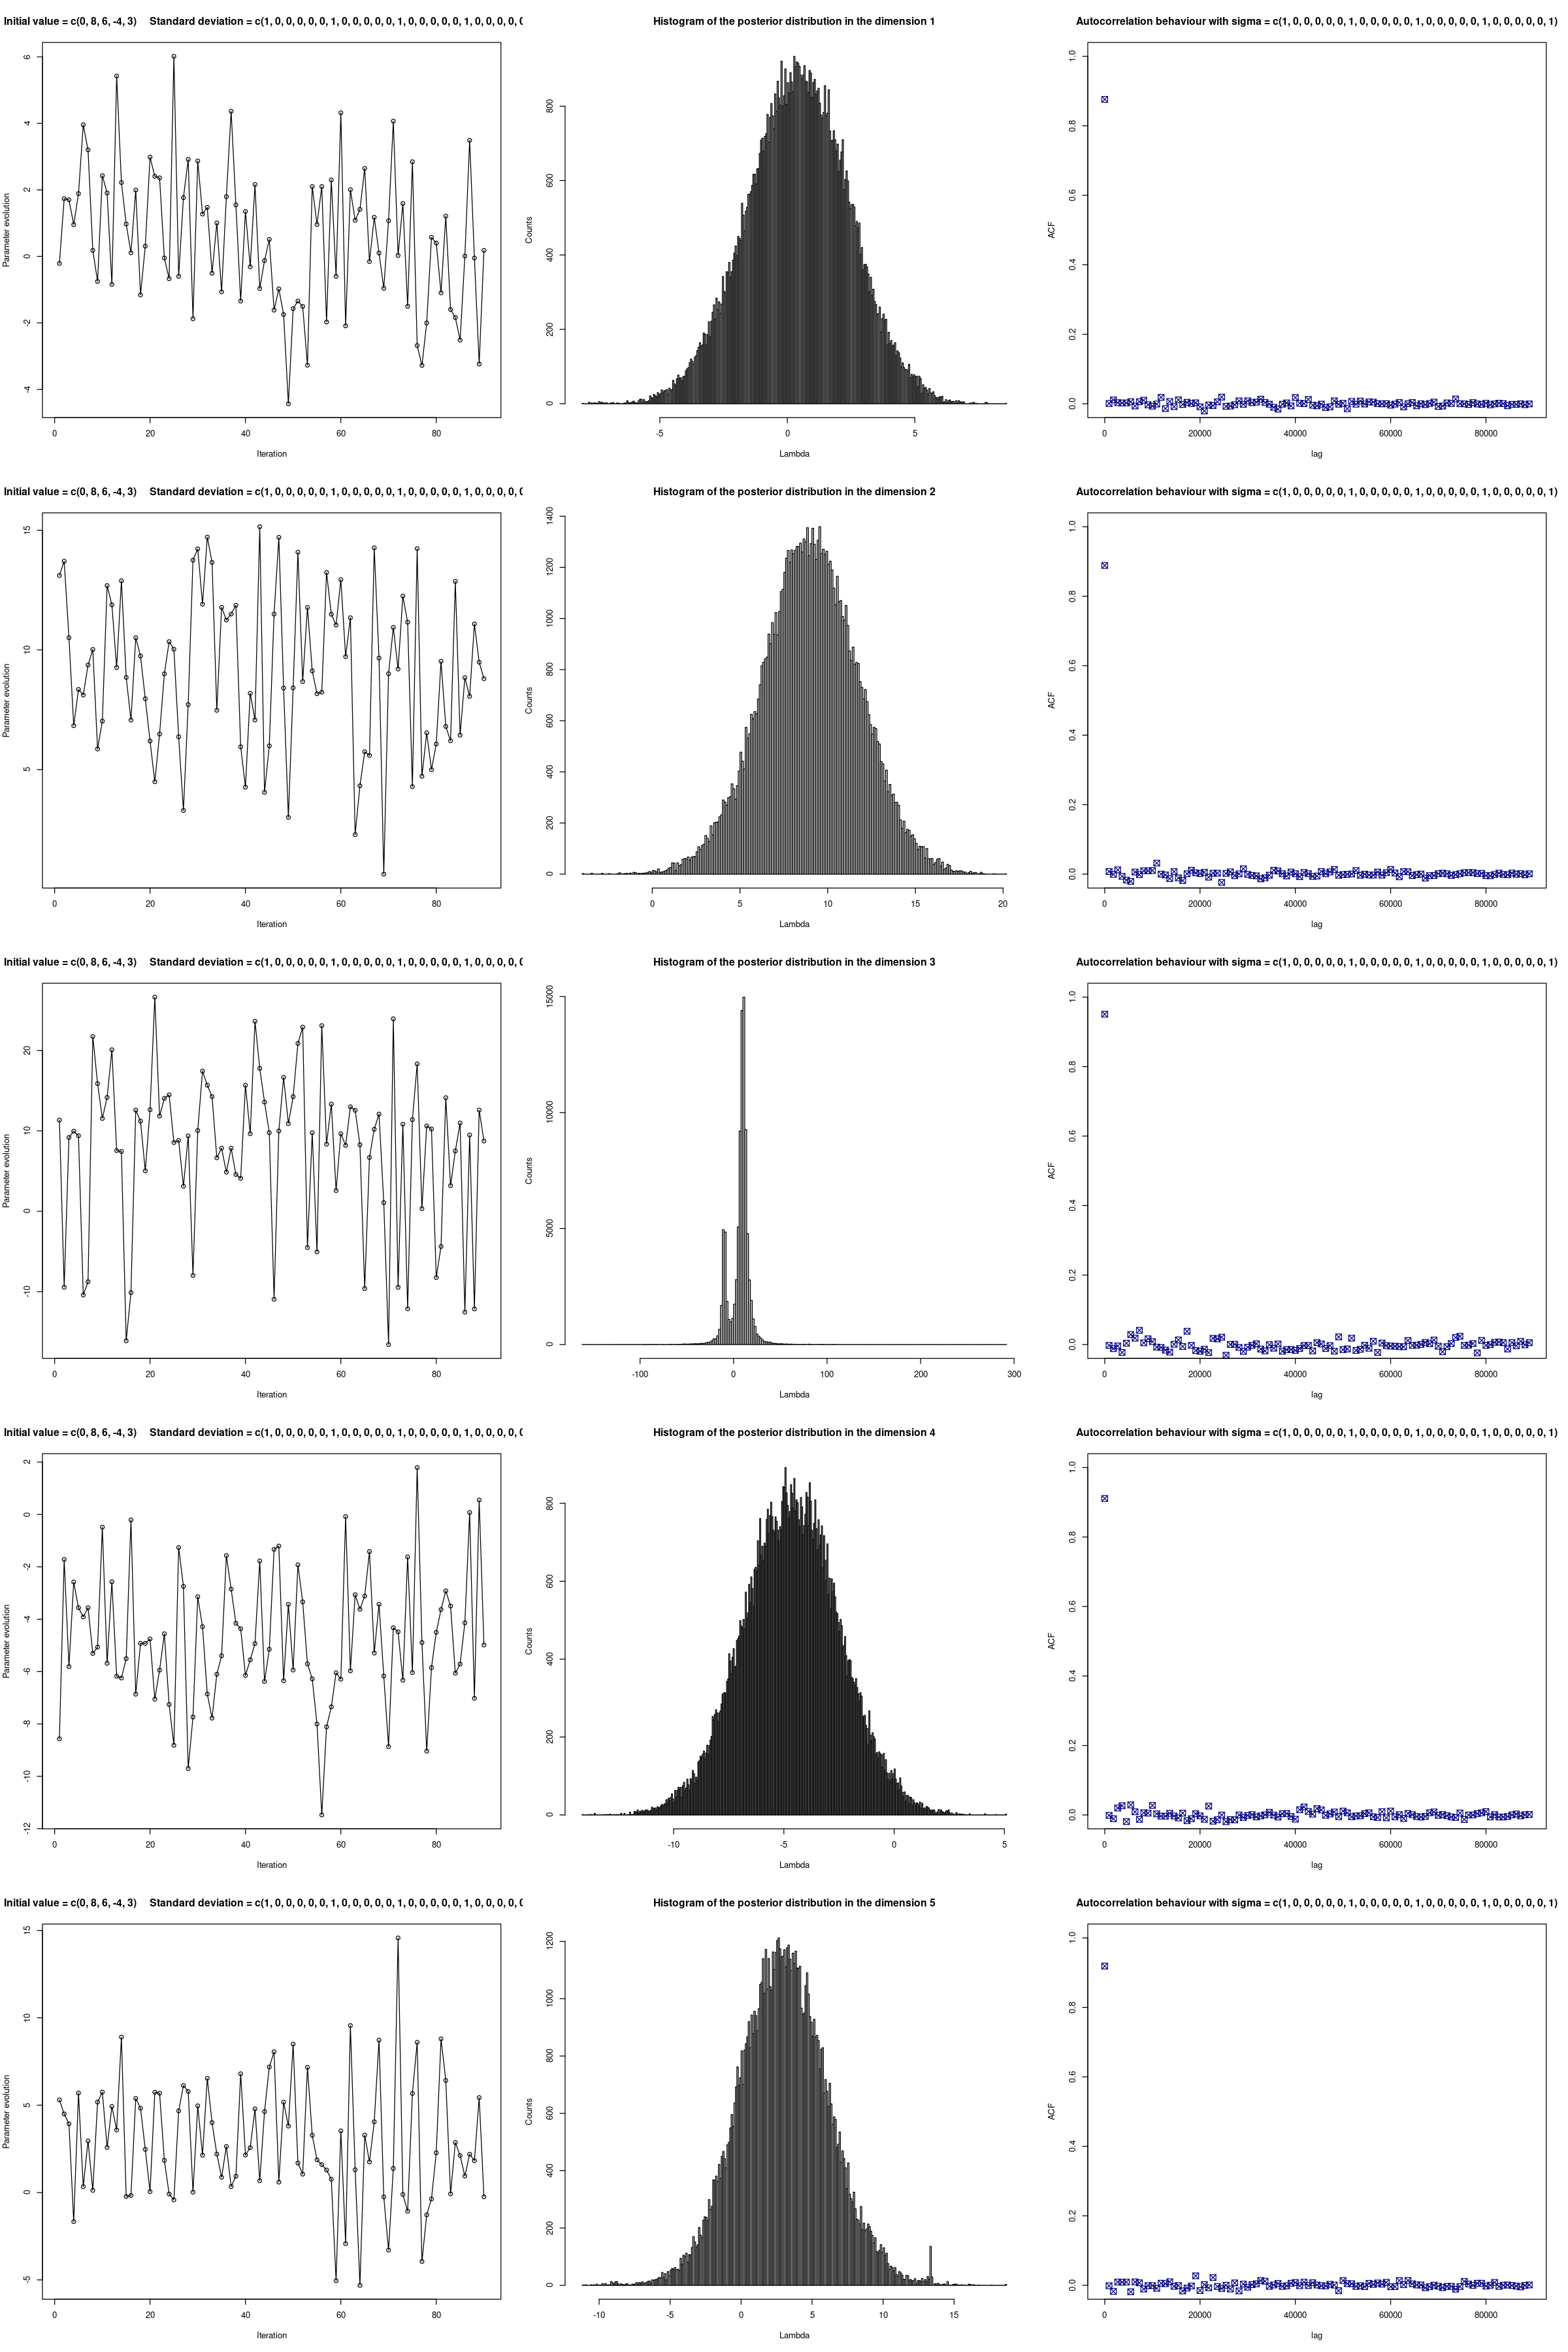

In [14]:
# GLOBAL GIBBS

mcmc_g = random_steps_global_gibbs (func_wanted = chosen_function, theta_init = init, n_samples = N_tot, sigma = std, print_accept=TRUE, t_0 = burn_in,
                                gamma_function = gamma_series_exp, halved_step = burn_in)

mcmc_g = mcmc_g[burn_in:N, ]

show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)